# Project Kick-off: Global Superstore Sales & Profit Analysis

## Project Overview
This project focuses on analyzing the **Global Superstore** dataset, a retail dataset containing customer orders across different product categories, customer segments, and global regions. The dataset includes details such as sales, profit, discounts, shipping methods, and order dates, making it suitable for business performance analysis.

## Objective
The main goal of this project is to explore sales and profit patterns to answer key business questions:
- Which product categories and sub-categories drive the most revenue and profit?
- How do sales and profits change over time (monthly or seasonal trends)?
- Which regions and customer segments are most profitable?
- Are there categories with high sales but low profitability?

## Tools & Approach
- **Pandas**: Data loading, cleaning, and exploratory analysis  
- **Matplotlib & Seaborn**: Static visualizations for trends and comparisons  
- **Plotly**: Interactive charts for deeper insights  
- **Jupyter/Colab Notebook**: Organized workflow with explanations and charts

## Deliverables
The outcome will be a structured notebook presented as a dashboard-style report with the following sections:
1. Dataset preparation and cleaning  
2. Exploratory data analysis (EDA) with summary statistics  
3. Visualizations: bar charts, line charts, pie charts, heatmaps, and histograms  
4. Key insights and conclusions supported by visual evidence  

By the end of this project, I aim to highlight performance trends and provide actionable insights into product, regional, and temporal sales behaviors within the Global Superstore dataset.


## **DataSet Preparation**

In [ ]:
# Import libraries and load dataset
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

uploaded = files.upload()
df = pd.read_csv("Global_Superstore2.csv", encoding="latin1")
df.head()


Saving Global_Superstore2.csv to Global_Superstore2 (1).csv


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [ ]:
# Basic dataset overview
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.info()
df.describe(include="all").transpose()


Shape: (51290, 25)
Columns: ['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id', 'customer_name', 'segment', 'city', 'state', 'country', 'postal_code', 'market', 'region', 'product_id', 'category', 'sub-category', 'product_name', 'sales', 'quantity', 'discount', 'profit', 'shipping_cost', 'order_priority', 'month']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   row_id          51290 non-null  int64         
 1   order_id        51290 non-null  object        
 2   order_date      51290 non-null  datetime64[ns]
 3   ship_date       51290 non-null  datetime64[ns]
 4   ship_mode       51290 non-null  object        
 5   customer_id     51290 non-null  object        
 6   customer_name   51290 non-null  object        
 7   segment         51290 non-null  object        
 8   city            51290 no

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
row_id,51290.0,NaN,NaN,NaN,25645.5,1.0,12823.25,25645.5,38467.75,51290.0,14806.29199
order_id,51290,25035,CA-2014-100111,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_date,51290,NaN,NaN,NaN,2013-05-11 21:26:49.155781120,2011-01-01 00:00:00,2012-06-19 00:00:00,2013-07-08 00:00:00,2014-05-22 00:00:00,2014-12-31 00:00:00,NaN
ship_date,51290,NaN,NaN,NaN,2013-05-15 20:42:42.745174528,2011-01-03 00:00:00,2012-06-23 00:00:00,2013-07-12 00:00:00,2014-05-26 00:00:00,2015-01-07 00:00:00,NaN
ship_mode,51290,4,Standard Class,30775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,51290,1590,PO-18850,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_name,51290,795,Muhammed Yedwab,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
segment,51290,3,Consumer,26518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,51290,3636,New York City,915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,51290,1094,California,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# Clean dataset
df = df.drop_duplicates()
df = df.dropna(how="all")
df = df.fillna({"sales": 0, "profit": 0, "discount": 0})
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True, errors="coerce")
df['ship_date'] = pd.to_datetime(df['ship_date'], dayfirst=True, errors="coerce")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   row_id          51290 non-null  int64         
 1   order_id        51290 non-null  object        
 2   order_date      51290 non-null  datetime64[ns]
 3   ship_date       51290 non-null  datetime64[ns]
 4   ship_mode       51290 non-null  object        
 5   customer_id     51290 non-null  object        
 6   customer_name   51290 non-null  object        
 7   segment         51290 non-null  object        
 8   city            51290 non-null  object        
 9   state           51290 non-null  object        
 10  country         51290 non-null  object        
 11  postal_code     9994 non-null   float64       
 12  market          51290 non-null  object        
 13  region          51290 non-null  object        
 14  product_id      51290 non-null  object        
 15  ca

## **EDA (Exploratory Data Analysis)**

In [ ]:
# Step 3: Exploratory Data Analysis

# Summary statistics and missing values
df.describe().transpose()
df.isnull().sum()

# Check unique values for key categorical columns
categorical_cols = ['ship_mode','segment','city','state',
    'country','market','region','category','sub-category','order_priority']
for col in categorical_cols:
    print(col, ":", df[col].nunique())

# Correlation between numerical columns
df[['sales','profit','quantity','discount','shipping_cost']].corr()

# Top 10 products by sales
print("Top 10 products by sales:")
print(df.groupby('product_name')['sales']
      .sum().sort_values(ascending=False).head(10))

# Top 10 products by profit
print("\nTop 10 products by profit:")
print(df.groupby('product_name')['profit']
      .sum().sort_values(ascending=False).head(10))

# Sales and profit by category
df.groupby('category')[['sales','profit']].sum()

# Monthly sales and profit trends
df['month'] = df['order_date'].dt.to_period('M')
df.groupby('month')[['sales','profit']].sum().head(12)


ship_mode : 4
segment : 3
city : 3636
state : 1094
country : 147
market : 7
region : 13
category : 3
sub-category : 17
order_priority : 4
Top 10 products by sales:
product_name
Apple Smart Phone, Full Size                                86935.7786
Cisco Smart Phone, Full Size                                76441.5306
Motorola Smart Phone, Full Size                             73156.3030
Nokia Smart Phone, Full Size                                71904.5555
Canon imageCLASS 2200 Advanced Copier                       61599.8240
Hon Executive Leather Armchair, Adjustable                  58193.4841
Office Star Executive Leather Armchair, Adjustable          50661.6840
Harbour Creations Executive Leather Armchair, Adjustable    50121.5160
Samsung Smart Phone, Cordless                               48653.4600
Nokia Smart Phone, with Caller ID                           47877.7857
Name: sales, dtype: float64

Top 10 products by profit:
product_name
Canon imageCLASS 2200 Advanced Copier       

,sales,profit
month,,
2011-01,98898.48886,8321.80096
2011-02,91152.15698,12417.90698
2011-03,145729.36736,15303.56826
2011-04,116915.76418,12902.32438
2011-05,146747.83610,12183.82870
2011-06,215207.38022,23415.24702
2011-07,115510.41912,5585.00352
2011-08,207581.49122,23713.66772
2011-09,290214.45534,35776.88394


## **Data Visualization**

Bar Chart: Total Sales by Category - shows which product categories generate the most revenue.


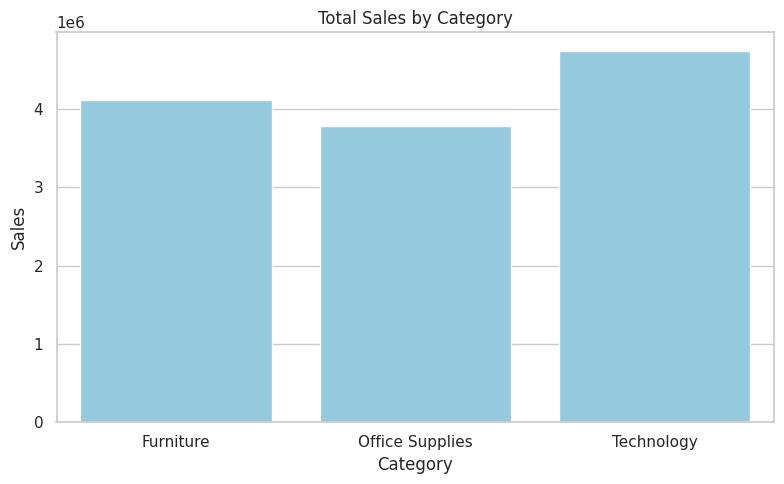


Line Chart: Monthly Sales Trend - visualizes how sales change over time.


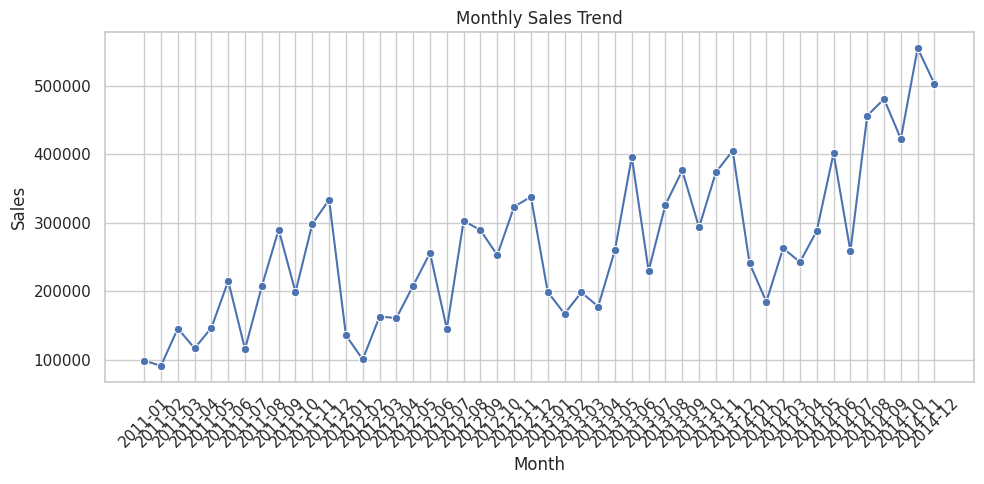


Pie Chart: Sales Distribution by Segment - shows the proportion of sales per customer segment.


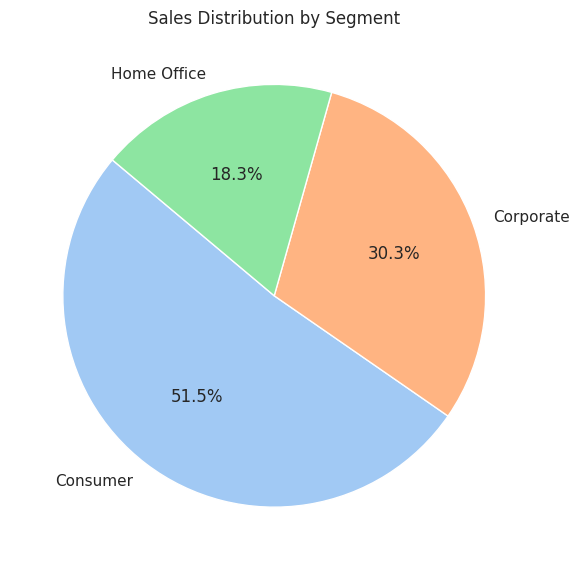


Heatmap: Correlation between numeric variables - shows relationships between sales, profit, quantity, discount, and shipping cost.


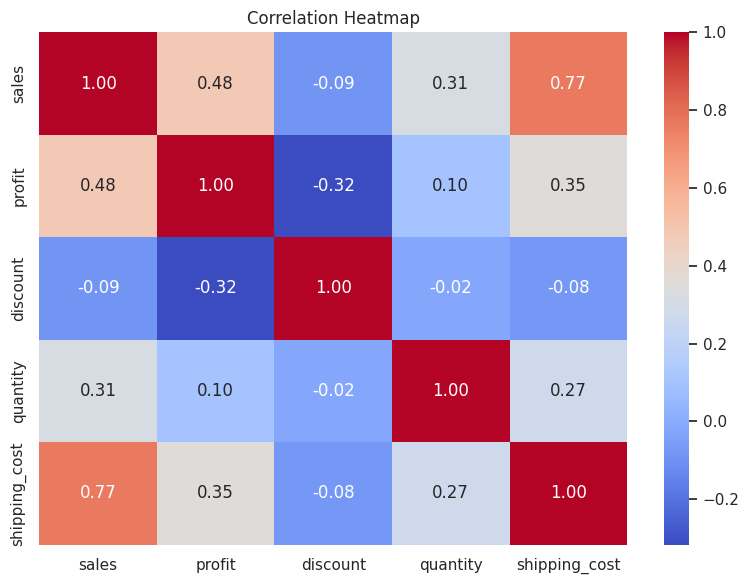

In [ ]:
# Step 4 : VISUALIZATIONS

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Total Sales by Category
print("Bar Chart: Total Sales by Category - shows which product categories generate the most revenue.")
category_sales = df.groupby('category')['sales'].sum().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=category_sales, x='category', y='sales', color='skyblue')
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.tight_layout()  # layout adjustment before show
plt.show()

# Monthly Sales Trend
print("\nLine Chart: Monthly Sales Trend - visualizes how sales change over time.")
df['month'] = df['order_date'].dt.to_period('M').astype(str)
monthly_sales = df.groupby('month')['sales'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_sales, x='month', y='sales', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sales Distribution by Segment
print("\nPie Chart: Sales Distribution by Segment - shows the proportion of sales per customer segment.")
segment_sales = df.groupby('segment')['sales'].sum()
plt.figure(figsize=(6,6))
plt.pie(segment_sales, labels=segment_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Sales Distribution by Segment")
plt.tight_layout()
plt.show()

# Correlation Heatmap
print("\nHeatmap: Correlation between numeric variables - shows relationships between sales, profit, quantity, discount, and shipping cost.")
plt.figure(figsize=(8,6))
sns.heatmap(df[['sales','profit','discount','quantity','shipping_cost']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


## **Dashboard Creation**
This dashboard shows key insights from the Global Superstore dataset:
- Total sales and profits by category
- Monthly sales trends
- Top products
- Correlation heatmap

In [ ]:
!pip install plotly

import plotly.express as px
import plotly.graph_objects as go
import pandas as pd


In [ ]:
# Category Summary
category_summary = df.groupby('category')[['sales','profit']].sum().reset_index()

# Interactive bar chart for sales
fig_sales = px.bar(category_summary,
                   x='category',
                   y='sales',
                   title='Total Sales by Category',
                   labels={'sales':'Sales', 'category':'Category'},
                   color='sales', color_continuous_scale='Blues')

fig_sales.show()

# Interactive bar chart for profit
fig_profit = px.bar(category_summary,
                    x='category',
                    y='profit',
                    title='Total Profit by Category',
                    labels={'profit':'Profit', 'category':'Category'},
                    color='profit', color_continuous_scale='Greens')

fig_profit.show()


**Insight:** Technology leads in sales, but Office Supplies shows stable profit across orders.


In [ ]:
top_sales = df.groupby('product_name')
['sales'].sum().sort_values(ascending=False).head(10)
top_profit = df.groupby('product_name')
['profit'].sum().sort_values(ascending=False).head(10)

# Top Sales
fig_top_sales = px.bar(top_sales.reset_index(),
                       x='sales', y='product_name',
                       title='Top 10 Products by Sales',
                       orientation='h',
                       color='sales', color_continuous_scale='Blues')
fig_top_sales.show()

# Top Profit
fig_top_profit = px.bar(top_profit.reset_index(),
                        x='profit', y='product_name',
                        title='Top 10 Products by Profit',
                        orientation='h',
                        color='profit', color_continuous_scale='Greens')
fig_top_profit.show()


**Insight:** Sales and profit peak during holiday seasons; some months show negative profit due to discounts.


In [ ]:
df['month'] = df['order_date'].dt.to_period('M')
monthly_sales = df.groupby('month')[['sales','profit']].sum().reset_index()
monthly_sales['month'] = monthly_sales['month'].dt.to_timestamp()

fig_trends = go.Figure()
fig_trends.add_trace(go.Scatter(x=monthly_sales['month'], y=monthly_sales['sales'],
                                mode='lines+markers', name='Sales'))
fig_trends.add_trace(go.Scatter(x=monthly_sales['month'], y=monthly_sales['profit'],
                                mode='lines+markers', name='Profit'))

fig_trends.update_layout(title='Monthly Sales & Profit Trends',
                         xaxis_title='Month',
                         yaxis_title='Amount',
                         template='plotly_white')
fig_trends.show()


**Insight:** Smartphones dominate sales, but high-end copiers generate the most profit.


In [ ]:
corr = df[['sales','profit','discount','quantity','shipping_cost']].corr()
fig_heatmap = px.imshow(corr,
                        text_auto=True,
                        color_continuous_scale='RdBu_r',
                        title='Correlation Heatmap')
fig_heatmap.show()


**Insight:** Sales and profit are strongly correlated, while discount has a slight negative effect on profit.


### Conclusions

**Key Insights:**  
- Technology leads in sales; Office Supplies maintain stable profit.  
- Sales and profit peak during holidays; some months show negative profit due to discounts.  
- Smartphones dominate sales, high-end copiers drive most profit.  
- Sales and profit are strongly correlated; discounts slightly reduce profit.  

**Recommendations:**  
- Focus on high-performing categories and profitable products.  
- Monitor discount strategies to protect profit margins.  
- Plan inventory and marketing around seasonal peaks.
